# OCR using CNN

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

sys.path.append('../src')
from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

Loading segmentation models...
INFO:tensorflow:Restoring parameters from C:\Users\Gupta\Desktop\Ver\src\ocr\../../models/gap-clas/CNN-CG
INFO:tensorflow:Restoring parameters from C:\Users\Gupta\Desktop\Ver\src\ocr\../../models/gap-clas/RNN/Bi-RNN-new


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [3]:
IMG = '../data/pages/5.jpg' 
LANG = 'en'
MODEL_LOC_CTC = '../models/word-clas/CTC/Classifier1'

In [4]:
CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

INFO:tensorflow:Restoring parameters from ../models/word-clas/CTC/Classifier1


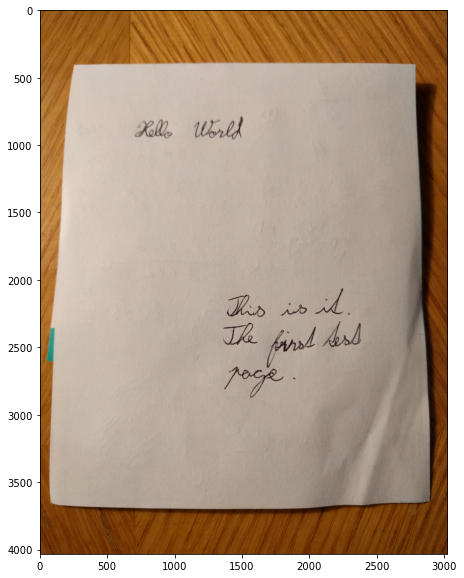

In [5]:
image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
implt(image)

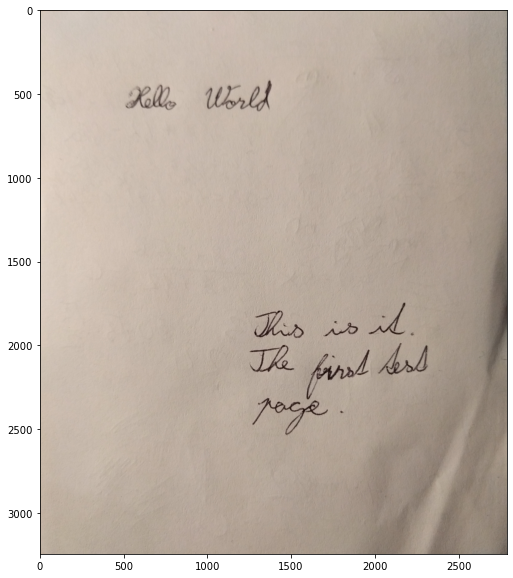

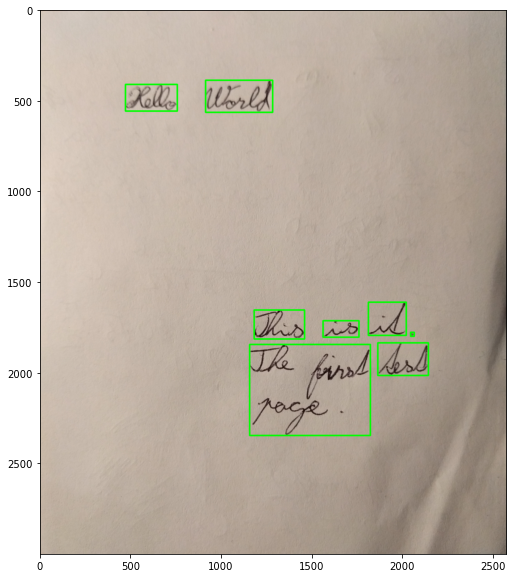

In [6]:
crop = page.detection(image)
implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

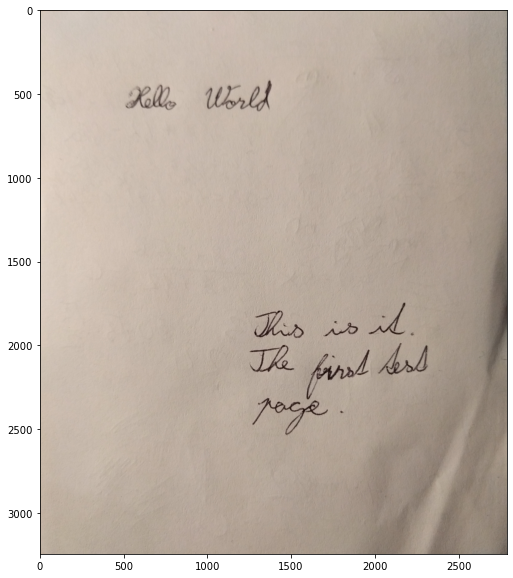

Gdkkn Vnqkc
Sghr hr hs n
OZedms drs


In [7]:
def recognise(img):
    img = word_normalization(
        img,
        64,
        border=False,
        tilt=False,
        hyst_norm=False)
    length = img.shape[1]
    input_imgs = np.zeros(
            (1, 64, length, 1), dtype=np.uint8)
    input_imgs[0][:, :length, 0] = img

    pred = CTC_MODEL.eval_feed({
        'inputs:0': input_imgs,
        'inputs_length:0': [length],
        'keep_prob:0': 1})[0]

    word = ''
    for i in pred:
        word += idx2char(i)
    return word

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))